In [1]:
import numpy as np
import pandas as pd
from shutil import copyfile
from astropy.cosmology import Planck13 as cosmo
import fsps
from matplotlib import gridspec
from astropy.io import fits
from astropy import wcs
from astropy.modeling.models import Sersic2D
from astropy.table import Table
from sim_engine import Scale_model
from spec_tools import Source_present, Oldest_galaxy, Sig_int, Smooth, Gen_SFH
from spec_stats import Smooth, Highest_density_region
from spec_id import *
from spec_id_2d import Gen_multibeams, Gen_temp_dict, args
from spec_stats import Highest_density_region, Linear_fit
from spec_exam import Gen_spec
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d, interp2d
from glob import glob
import seaborn as sea
import os
from grizli import multifit
from grizli import model
from sim_engine import forward_model_grism
from astropy.wcs import wcs

import rpy2
import rpy2.robjects as robjects
from rpy2.robjects.packages import importr
from rpy2.robjects import pandas2ri
R = robjects.r
pandas2ri.activate()

from time import time
sea.set(style='white')
sea.set(style='ticks')
sea.set_style({'xtick.direct'
               'ion': 'in','xtick.top':True,'xtick.minor.visible': True,
               'ytick.direction': "in",'ytick.right': True,'ytick.minor.visible': True})
cmap = sea.cubehelix_palette(12, start=2, rot=.2, dark=0, light=1.0, as_cmap=True)
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

### set home for files
hpath = os.environ['HOME'] + '/'

if hpath == '/Users/Vince.ec/':
    dpath = '/Volumes/Vince_research/Data/' 
    
else:
    dpath = hpath + 'Data/' 

In [5]:
Bdb = pd.read_pickle('../dataframes/fitdb/buldgefitsdb.pkl')
sfdb = pd.read_pickle('../Casey_data/SF_db_p1.pkl')
mdb = pd.read_pickle('../dataframes/fitdb/fullfitdb.pkl')

sfdb = sfdb.query('AGN != "AGN"')
mdb = mdb.query('AGN != "AGN"')

badfits = [13943, 21290, 29098, 32275, 35979,13429, 18224, 25505, 25550, 34999, 20788, 21615, 41886, 42915, 45795]

inout = np.repeat(True, len(Bdb))

idx =  0
for i in Bdb.index:
    if Bdb.id[i] in badfits:
        inout[idx] = False
    idx+=1
    
Bdb['inout'] = inout

Bdb = Bdb.query('inout == True')

Xdb = Bdb.query('AGN == "AGN" and lwa > 0 and log_ssfr > -20')
Qdb = Bdb.query('log_ssfr < -11 and AGN != "AGN" and lwa > 0 and log_ssfr > -20')
Sdb = Bdb.query('log_ssfr > -11 and AGN != "AGN" and lwa > 0 and log_ssfr > -20')
QXdb = Xdb.query('log_ssfr < -11 and inout == True')
SXdb = Xdb.query('log_ssfr > -11 and inout == True')

In [7]:
SXdb.z_grizli

4      1.222988
10     1.613136
11     2.306281
13     2.449117
14     2.324508
67          NaN
82          NaN
84     1.220616
85     0.557419
90     2.431394
91     2.979857
99     2.060118
113    0.834618
119    1.024086
217         NaN
Name: z_grizli, dtype: float64

/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.13.0_167_g5e9ee7c-py3.5-macosx-10.6-x86_64.egg/grizli/model.py:3510: RuntimeWarning: divide by zero encountered in true_divide
  self.ivar = 1/self.grism.data['ERR']**2
/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.13.0_167_g5e9ee7c-py3.5-macosx-10.6-x86_64.egg/grizli/model.py:3553: RuntimeWarning: invalid value encountered in sqrt
  resid = np.abs(self.scif - self.flat_flam)*np.sqrt(self.ivarf)
/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.13.0_167_g5e9ee7c-py3.5-macosx-10.6-x86_64.egg/grizli/model.py:3558: RuntimeWarning: invalid value encountered in sqrt
  contam_mask = ((self.contam*np.sqrt(self.ivar) > contam_sn_mask[0]) &
/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.13.0_167_g5e9ee7c-py3.5-macosx-10.6-x86_64.egg/grizli/model.py:3559: RuntimeWarning: invalid value encountered in sqrt
  (self.model*np.

1 icoi1eqkq_flt.fits G102
2 icoi1eqmq_flt.fits G102
3 icoi1eqoq_flt.fits G102
4 icoi1eqsq_flt.fits G102
5 icoi1eqyq_flt.fits G102
6 icoi1er1q_flt.fits G102
7 icoi1er3q_flt.fits G102
8 icoi1er7q_flt.fits G102
9 icoi1fzrq_flt.fits G102
10 icoi1fztq_flt.fits G102
11 icoi1fzvq_flt.fits G102
12 icoi1fzzq_flt.fits G102
13 icoi1fa6q_flt.fits G102
14 icoi1fa9q_flt.fits G102
15 icoi1fabq_flt.fits G102
16 icoi1fafq_flt.fits G102
17 icoi1gxjq_flt.fits G102
18 icoi1gxlq_flt.fits G102
19 icoi1gxoq_flt.fits G102
20 icoi1gxsq_flt.fits G102
21 icoi1gxyq_flt.fits G102
22 icoi1gy1q_flt.fits G102
23 icoi1gy3q_flt.fits G102
24 icoi1gy7q_flt.fits G102
25 icoi1hydq_flt.fits G102
26 icoi1hyfq_flt.fits G102
27 icoi1hyhq_flt.fits G102
28 icoi1hylq_flt.fits G102
29 icoi1hyrq_flt.fits G102
30 icoi1hyuq_flt.fits G102
31 icoi1hywq_flt.fits G102
32 icoi1hz0q_flt.fits G102
33 icoi1qduq_flt.fits G102
34 icoi1qdwq_flt.fits G102
35 icoi1qedq_flt.fits G102
36 icoi1qehq_flt.fits G102
37 icoi1rn3q_flt.fits G102
38 icoi1rn

/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.13.0_167_g5e9ee7c-py3.5-macosx-10.6-x86_64.egg/grizli/multifit.py:1433: RuntimeWarning: divide by zero encountered in true_divide
  beam.ivarf = 1./(1/beam.ivarf + (sys_err*beam.scif)**2)
/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.13.0_167_g5e9ee7c-py3.5-macosx-10.6-x86_64.egg/grizli/multifit.py:1573: RuntimeWarning: invalid value encountered in sqrt
  self.sivarf = np.sqrt(self.ivarf)
/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.13.0_167_g5e9ee7c-py3.5-macosx-10.6-x86_64.egg/grizli/multifit.py:1578: RuntimeWarning: invalid value encountered in sqrt
  self.weightf = np.exp(-(self.fcontam*np.abs(self.contamf)*np.sqrt(self.ivarf)))
/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.13.0_167_g5e9ee7c-py3.5-macosx-10.6-x86_64.egg/grizli/model.py:557: RuntimeWarning: divide by zero encountered in true_divide
  se

missing g141


/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.13.0_167_g5e9ee7c-py3.5-macosx-10.6-x86_64.egg/grizli/model.py:3553: RuntimeWarning: invalid value encountered in sqrt
  resid = np.abs(self.scif - self.flat_flam)*np.sqrt(self.ivarf)
/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.13.0_167_g5e9ee7c-py3.5-macosx-10.6-x86_64.egg/grizli/model.py:3558: RuntimeWarning: invalid value encountered in sqrt
  contam_mask = ((self.contam*np.sqrt(self.ivar) > contam_sn_mask[0]) &
/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.13.0_167_g5e9ee7c-py3.5-macosx-10.6-x86_64.egg/grizli/model.py:3559: RuntimeWarning: invalid value encountered in sqrt
  (self.model*np.sqrt(self.ivar) < contam_sn_mask[1]))


1 ibhj30bzq_flt.fits G141
2 ibhj30c6q_flt.fits G141
3 ibhj30cdq_flt.fits G141
4 ibhj30ckq_flt.fits G141
5 icxt15emq_flt.fits G102


/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.13.0_167_g5e9ee7c-py3.5-macosx-10.6-x86_64.egg/grizli/model.py:3510: RuntimeWarning: divide by zero encountered in true_divide
  self.ivar = 1/self.grism.data['ERR']**2


6 icxt15enq_flt.fits G102
7 icxt15esq_flt.fits G102
8 icxt15ewq_flt.fits G102
9 icxt16jzq_flt.fits G102
10 icxt16k0q_flt.fits G102
11 icxt16k3q_flt.fits G102
12 icxt16k5q_flt.fits G102
13 icxt13gfq_flt.fits G102
14 icxt13ghq_flt.fits G102
15 icxt13gkq_flt.fits G102
16 icxt13gmq_flt.fits G102
17 icxt14roq_flt.fits G102
18 icxt14rqq_flt.fits G102
19 icxt14rtq_flt.fits G102
20 icxt14rvq_flt.fits G102
21 icxt17aiq_flt.fits G102
22 icxt17akq_flt.fits G102
23 icxt17anq_flt.fits G102
24 icxt17apq_flt.fits G102
25 icxt18ykq_flt.fits G102
26 icxt18ynq_flt.fits G102
27 icxt18zgq_flt.fits G102
28 icxt18zjq_flt.fits G102


/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.13.0_167_g5e9ee7c-py3.5-macosx-10.6-x86_64.egg/grizli/multifit.py:1433: RuntimeWarning: divide by zero encountered in true_divide
  beam.ivarf = 1./(1/beam.ivarf + (sys_err*beam.scif)**2)
/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.13.0_167_g5e9ee7c-py3.5-macosx-10.6-x86_64.egg/grizli/multifit.py:1573: RuntimeWarning: invalid value encountered in sqrt
  self.sivarf = np.sqrt(self.ivarf)
/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.13.0_167_g5e9ee7c-py3.5-macosx-10.6-x86_64.egg/grizli/multifit.py:1578: RuntimeWarning: invalid value encountered in sqrt
  self.weightf = np.exp(-(self.fcontam*np.abs(self.contamf)*np.sqrt(self.ivarf)))
/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.13.0_167_g5e9ee7c-py3.5-macosx-10.6-x86_64.egg/grizli/model.py:557: RuntimeWarning: divide by zero encountered in true_divide
  se

1 ibhj30bzq_flt.fits G141
2 ibhj30c6q_flt.fits G141
3 ibhj30cdq_flt.fits G141
4 ibhj30ckq_flt.fits G141
5 icxt15emq_flt.fits G102
6 icxt15enq_flt.fits G102
7 icxt15esq_flt.fits G102
8 icxt15ewq_flt.fits G102
9 icxt16jzq_flt.fits G102
10 icxt16k0q_flt.fits G102
11 icxt16k3q_flt.fits G102
12 icxt16k5q_flt.fits G102
13 icxt13gfq_flt.fits G102
14 icxt13ghq_flt.fits G102
15 icxt13gkq_flt.fits G102
16 icxt13gmq_flt.fits G102
17 icxt14roq_flt.fits G102
18 icxt14rqq_flt.fits G102
19 icxt14rtq_flt.fits G102
20 icxt14rvq_flt.fits G102
21 icxt17aiq_flt.fits G102
22 icxt17akq_flt.fits G102
23 icxt17anq_flt.fits G102
24 icxt17apq_flt.fits G102
25 icxt18ykq_flt.fits G102
26 icxt18ynq_flt.fits G102
27 icxt18zgq_flt.fits G102
28 icxt18zjq_flt.fits G102


/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.13.0_167_g5e9ee7c-py3.5-macosx-10.6-x86_64.egg/grizli/model.py:3510: RuntimeWarning: divide by zero encountered in true_divide
  self.ivar = 1/self.grism.data['ERR']**2
/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.13.0_167_g5e9ee7c-py3.5-macosx-10.6-x86_64.egg/grizli/model.py:3553: RuntimeWarning: invalid value encountered in sqrt
  resid = np.abs(self.scif - self.flat_flam)*np.sqrt(self.ivarf)
/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.13.0_167_g5e9ee7c-py3.5-macosx-10.6-x86_64.egg/grizli/model.py:3558: RuntimeWarning: invalid value encountered in sqrt
  contam_mask = ((self.contam*np.sqrt(self.ivar) > contam_sn_mask[0]) &
/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.13.0_167_g5e9ee7c-py3.5-macosx-10.6-x86_64.egg/grizli/model.py:3559: RuntimeWarning: invalid value encountered in sqrt
  (self.model*np.

1 ibhj35vuq_flt.fits G141
2 ibhj35w1q_flt.fits G141
3 ibhj35w8q_flt.fits G141
4 ibhj35wfq_flt.fits G141


/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.13.0_167_g5e9ee7c-py3.5-macosx-10.6-x86_64.egg/grizli/multifit.py:1433: RuntimeWarning: divide by zero encountered in true_divide
  beam.ivarf = 1./(1/beam.ivarf + (sys_err*beam.scif)**2)
/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.13.0_167_g5e9ee7c-py3.5-macosx-10.6-x86_64.egg/grizli/multifit.py:1573: RuntimeWarning: invalid value encountered in sqrt
  self.sivarf = np.sqrt(self.ivarf)
/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.13.0_167_g5e9ee7c-py3.5-macosx-10.6-x86_64.egg/grizli/multifit.py:1578: RuntimeWarning: invalid value encountered in sqrt
  self.weightf = np.exp(-(self.fcontam*np.abs(self.contamf)*np.sqrt(self.ivarf)))


1 ibhj30bzq_flt.fits G141
2 ibhj30c6q_flt.fits G141
3 ibhj30cdq_flt.fits G141
4 ibhj30ckq_flt.fits G141
5 ibhj35vuq_flt.fits G141
6 ibhj35w1q_flt.fits G141
7 ibhj35w8q_flt.fits G141
8 ibhj35wfq_flt.fits G141
9 icxt15emq_flt.fits G102
10 icxt15enq_flt.fits G102
11 icxt15esq_flt.fits G102
12 icxt15ewq_flt.fits G102
13 icxt16jzq_flt.fits G102
14 icxt16k0q_flt.fits G102
15 icxt16k3q_flt.fits G102
16 icxt16k5q_flt.fits G102
17 icxt13gfq_flt.fits G102
18 icxt13ghq_flt.fits G102
19 icxt13gkq_flt.fits G102
20 icxt13gmq_flt.fits G102
21 icxt14roq_flt.fits G102
22 icxt14rqq_flt.fits G102
23 icxt14rtq_flt.fits G102
24 icxt14rvq_flt.fits G102
25 icxt17aiq_flt.fits G102
26 icxt17akq_flt.fits G102
27 icxt17anq_flt.fits G102
28 icxt17apq_flt.fits G102
29 icxt18ykq_flt.fits G102
30 icxt18ynq_flt.fits G102
31 icxt18zgq_flt.fits G102
32 icxt18zjq_flt.fits G102


/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.13.0_167_g5e9ee7c-py3.5-macosx-10.6-x86_64.egg/grizli/model.py:557: RuntimeWarning: divide by zero encountered in true_divide
  self.optimal_profile = m/m.sum(axis=0)
/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.13.0_167_g5e9ee7c-py3.5-macosx-10.6-x86_64.egg/grizli/model.py:557: RuntimeWarning: invalid value encountered in true_divide
  self.optimal_profile = m/m.sum(axis=0)


1 ibhj35vuq_flt.fits G141
2 ibhj35w1q_flt.fits G141
3 ibhj35w8q_flt.fits G141
4 ibhj35wfq_flt.fits G141
1 ibhj30bzq_flt.fits G141
2 ibhj30c6q_flt.fits G141
3 ibhj30cdq_flt.fits G141
4 ibhj30ckq_flt.fits G141
5 ibhj35vuq_flt.fits G141
6 ibhj35w1q_flt.fits G141
7 ibhj35w8q_flt.fits G141
8 ibhj35wfq_flt.fits G141
9 icxt15emq_flt.fits G102
10 icxt15enq_flt.fits G102
11 icxt15esq_flt.fits G102
12 icxt15ewq_flt.fits G102
13 icxt16jzq_flt.fits G102
14 icxt16k0q_flt.fits G102
15 icxt16k3q_flt.fits G102
16 icxt16k5q_flt.fits G102
17 icxt13gfq_flt.fits G102
18 icxt13ghq_flt.fits G102
19 icxt13gkq_flt.fits G102
20 icxt13gmq_flt.fits G102
21 icxt14roq_flt.fits G102
22 icxt14rqq_flt.fits G102
23 icxt14rtq_flt.fits G102
24 icxt14rvq_flt.fits G102
25 icxt17aiq_flt.fits G102
26 icxt17akq_flt.fits G102
27 icxt17anq_flt.fits G102
28 icxt17apq_flt.fits G102
29 icxt18ykq_flt.fits G102
30 icxt18ynq_flt.fits G102
31 icxt18zgq_flt.fits G102
32 icxt18zjq_flt.fits G102


/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.13.0_167_g5e9ee7c-py3.5-macosx-10.6-x86_64.egg/grizli/model.py:3553: RuntimeWarning: invalid value encountered in sqrt
  resid = np.abs(self.scif - self.flat_flam)*np.sqrt(self.ivarf)
/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.13.0_167_g5e9ee7c-py3.5-macosx-10.6-x86_64.egg/grizli/model.py:3558: RuntimeWarning: invalid value encountered in sqrt
  contam_mask = ((self.contam*np.sqrt(self.ivar) > contam_sn_mask[0]) &
/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.13.0_167_g5e9ee7c-py3.5-macosx-10.6-x86_64.egg/grizli/model.py:3559: RuntimeWarning: invalid value encountered in sqrt
  (self.model*np.sqrt(self.ivar) < contam_sn_mask[1]))


1 ibhj11hiq_flt.fits G141
2 ibhj11hpq_flt.fits G141
3 ibhj11hwq_flt.fits G141
4 ibhj11i3q_flt.fits G141
5 ibhj03xoq_flt.fits G141
6 ibhj03xvq_flt.fits G141
7 ibhj03y2q_flt.fits G141
8 ibhj03y9q_flt.fits G141
9 icxt03jjq_flt.fits G102
10 icxt03jkq_flt.fits G102
11 icxt03jnq_flt.fits G102
12 icxt03jpq_flt.fits G102
13 icxt04e3q_flt.fits G102
14 icxt04e4q_flt.fits G102
15 icxt04edq_flt.fits G102
16 icxt04efq_flt.fits G102
17 icxt01cgq_flt.fits G102
18 icxt01ciq_flt.fits G102
19 icxt01clq_flt.fits G102
20 icxt01cnq_flt.fits G102
21 icxt02c7q_flt.fits G102
22 icxt02caq_flt.fits G102
23 icxt02cdq_flt.fits G102
24 icxt02cfq_flt.fits G102
25 icxt05h7q_flt.fits G102
26 icxt05h9q_flt.fits G102
27 icxt05hcq_flt.fits G102
28 icxt05heq_flt.fits G102
29 icxt06laq_flt.fits G102
30 icxt06lcq_flt.fits G102
31 icxt06lfq_flt.fits G102
32 icxt06lhq_flt.fits G102


/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.13.0_167_g5e9ee7c-py3.5-macosx-10.6-x86_64.egg/grizli/multifit.py:1433: RuntimeWarning: divide by zero encountered in true_divide
  beam.ivarf = 1./(1/beam.ivarf + (sys_err*beam.scif)**2)
/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.13.0_167_g5e9ee7c-py3.5-macosx-10.6-x86_64.egg/grizli/multifit.py:1573: RuntimeWarning: invalid value encountered in sqrt
  self.sivarf = np.sqrt(self.ivarf)
/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.13.0_167_g5e9ee7c-py3.5-macosx-10.6-x86_64.egg/grizli/multifit.py:1578: RuntimeWarning: invalid value encountered in sqrt
  self.weightf = np.exp(-(self.fcontam*np.abs(self.contamf)*np.sqrt(self.ivarf)))


1 ibhj11hiq_flt.fits G141
2 ibhj11hpq_flt.fits G141
3 ibhj11hwq_flt.fits G141
4 ibhj11i3q_flt.fits G141


/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.13.0_167_g5e9ee7c-py3.5-macosx-10.6-x86_64.egg/grizli/model.py:557: RuntimeWarning: divide by zero encountered in true_divide
  self.optimal_profile = m/m.sum(axis=0)
/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.13.0_167_g5e9ee7c-py3.5-macosx-10.6-x86_64.egg/grizli/model.py:557: RuntimeWarning: invalid value encountered in true_divide
  self.optimal_profile = m/m.sum(axis=0)


1 ibhj11hiq_flt.fits G141
2 ibhj11hpq_flt.fits G141
3 ibhj11hwq_flt.fits G141
4 ibhj11i3q_flt.fits G141
5 ibhj03xoq_flt.fits G141
6 ibhj03xvq_flt.fits G141
7 ibhj03y2q_flt.fits G141
8 ibhj03y9q_flt.fits G141
9 icxt03jjq_flt.fits G102
10 icxt03jkq_flt.fits G102
11 icxt03jnq_flt.fits G102
12 icxt03jpq_flt.fits G102
13 icxt04e3q_flt.fits G102
14 icxt04e4q_flt.fits G102
15 icxt04edq_flt.fits G102
16 icxt04efq_flt.fits G102
17 icxt01cgq_flt.fits G102
18 icxt01ciq_flt.fits G102
19 icxt01clq_flt.fits G102
20 icxt01cnq_flt.fits G102
21 icxt02c7q_flt.fits G102
22 icxt02caq_flt.fits G102
23 icxt02cdq_flt.fits G102
24 icxt02cfq_flt.fits G102
25 icxt05h7q_flt.fits G102
26 icxt05h9q_flt.fits G102
27 icxt05hcq_flt.fits G102
28 icxt05heq_flt.fits G102
29 icxt06laq_flt.fits G102
30 icxt06lcq_flt.fits G102
31 icxt06lfq_flt.fits G102
32 icxt06lhq_flt.fits G102
1 ibhj11hiq_flt.fits G141
2 ibhj11hpq_flt.fits G141
3 ibhj11hwq_flt.fits G141
4 ibhj11i3q_flt.fits G141


/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.13.0_167_g5e9ee7c-py3.5-macosx-10.6-x86_64.egg/grizli/model.py:3510: RuntimeWarning: divide by zero encountered in true_divide
  self.ivar = 1/self.grism.data['ERR']**2
/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.13.0_167_g5e9ee7c-py3.5-macosx-10.6-x86_64.egg/grizli/model.py:3553: RuntimeWarning: invalid value encountered in sqrt
  resid = np.abs(self.scif - self.flat_flam)*np.sqrt(self.ivarf)
/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.13.0_167_g5e9ee7c-py3.5-macosx-10.6-x86_64.egg/grizli/model.py:3558: RuntimeWarning: invalid value encountered in sqrt
  contam_mask = ((self.contam*np.sqrt(self.ivar) > contam_sn_mask[0]) &
/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.13.0_167_g5e9ee7c-py3.5-macosx-10.6-x86_64.egg/grizli/model.py:3559: RuntimeWarning: invalid value encountered in sqrt
  (self.model*np.

1 icxt20f7q_flt.fits G102
2 icxt20f8q_flt.fits G102
3 icxt20fbq_flt.fits G102
4 icxt20fdq_flt.fits G102
5 icxt21b7q_flt.fits G102
6 icxt21b8q_flt.fits G102
7 icxt21bcq_flt.fits G102
8 icxt21beq_flt.fits G102
9 icxt19o6q_flt.fits G102
10 icxt19o7q_flt.fits G102
11 icxt19oaq_flt.fits G102
12 icxt19ocq_flt.fits G102
13 icxt22pmq_flt.fits G102
14 icxt22pnq_flt.fits G102
15 icxt22pqq_flt.fits G102
16 icxt22psq_flt.fits G102
17 icxt23pvq_flt.fits G102
18 icxt23pwq_flt.fits G102
19 icxt23pzq_flt.fits G102
20 icxt23q1q_flt.fits G102
21 ib6o23rsq_flt.fits G141
22 ib6o23ruq_flt.fits G141
23 ib6o23ryq_flt.fits G141
24 ib6o23s0q_flt.fits G141


/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.13.0_167_g5e9ee7c-py3.5-macosx-10.6-x86_64.egg/grizli/multifit.py:1433: RuntimeWarning: divide by zero encountered in true_divide
  beam.ivarf = 1./(1/beam.ivarf + (sys_err*beam.scif)**2)
/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.13.0_167_g5e9ee7c-py3.5-macosx-10.6-x86_64.egg/grizli/multifit.py:1573: RuntimeWarning: invalid value encountered in sqrt
  self.sivarf = np.sqrt(self.ivarf)
/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.13.0_167_g5e9ee7c-py3.5-macosx-10.6-x86_64.egg/grizli/multifit.py:1578: RuntimeWarning: invalid value encountered in sqrt
  self.weightf = np.exp(-(self.fcontam*np.abs(self.contamf)*np.sqrt(self.ivarf)))
/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.13.0_167_g5e9ee7c-py3.5-macosx-10.6-x86_64.egg/grizli/model.py:557: RuntimeWarning: divide by zero encountered in true_divide
  se

1 icxt20f7q_flt.fits G102
2 icxt20f8q_flt.fits G102
3 icxt20fbq_flt.fits G102
4 icxt20fdq_flt.fits G102
5 icxt21b7q_flt.fits G102
6 icxt21b8q_flt.fits G102
7 icxt21bcq_flt.fits G102
8 icxt21beq_flt.fits G102
9 icxt19o6q_flt.fits G102
10 icxt19o7q_flt.fits G102
11 icxt19oaq_flt.fits G102
12 icxt19ocq_flt.fits G102
13 icxt22pmq_flt.fits G102
14 icxt22pnq_flt.fits G102
15 icxt22pqq_flt.fits G102
16 icxt22psq_flt.fits G102
17 icxt23pvq_flt.fits G102
18 icxt23pwq_flt.fits G102
19 icxt23pzq_flt.fits G102
20 icxt23q1q_flt.fits G102
21 ib6o23rsq_flt.fits G141
22 ib6o23ruq_flt.fits G141
23 ib6o23ryq_flt.fits G141
24 ib6o23s0q_flt.fits G141


/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.13.0_167_g5e9ee7c-py3.5-macosx-10.6-x86_64.egg/grizli/model.py:3553: RuntimeWarning: invalid value encountered in sqrt
  resid = np.abs(self.scif - self.flat_flam)*np.sqrt(self.ivarf)
/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.13.0_167_g5e9ee7c-py3.5-macosx-10.6-x86_64.egg/grizli/model.py:3558: RuntimeWarning: invalid value encountered in sqrt
  contam_mask = ((self.contam*np.sqrt(self.ivar) > contam_sn_mask[0]) &
/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.13.0_167_g5e9ee7c-py3.5-macosx-10.6-x86_64.egg/grizli/model.py:3559: RuntimeWarning: invalid value encountered in sqrt
  (self.model*np.sqrt(self.ivar) < contam_sn_mask[1]))


1 ibhj11hiq_flt.fits G141
2 ibhj11hpq_flt.fits G141
3 ibhj11hwq_flt.fits G141
4 ibhj11i3q_flt.fits G141
5 icxt03jjq_flt.fits G102


/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.13.0_167_g5e9ee7c-py3.5-macosx-10.6-x86_64.egg/grizli/model.py:3510: RuntimeWarning: divide by zero encountered in true_divide
  self.ivar = 1/self.grism.data['ERR']**2


6 icxt03jkq_flt.fits G102
7 icxt03jnq_flt.fits G102
8 icxt03jpq_flt.fits G102
9 icxt04e3q_flt.fits G102
10 icxt04e4q_flt.fits G102
11 icxt04edq_flt.fits G102
12 icxt04efq_flt.fits G102


/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.13.0_167_g5e9ee7c-py3.5-macosx-10.6-x86_64.egg/grizli/multifit.py:1433: RuntimeWarning: divide by zero encountered in true_divide
  beam.ivarf = 1./(1/beam.ivarf + (sys_err*beam.scif)**2)
/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.13.0_167_g5e9ee7c-py3.5-macosx-10.6-x86_64.egg/grizli/multifit.py:1573: RuntimeWarning: invalid value encountered in sqrt
  self.sivarf = np.sqrt(self.ivarf)
/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.13.0_167_g5e9ee7c-py3.5-macosx-10.6-x86_64.egg/grizli/multifit.py:1578: RuntimeWarning: invalid value encountered in sqrt
  self.weightf = np.exp(-(self.fcontam*np.abs(self.contamf)*np.sqrt(self.ivarf)))


1 ibhj11hiq_flt.fits G141
2 ibhj11hpq_flt.fits G141
3 ibhj11hwq_flt.fits G141
4 ibhj11i3q_flt.fits G141
missing g102


/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.13.0_167_g5e9ee7c-py3.5-macosx-10.6-x86_64.egg/grizli/model.py:557: RuntimeWarning: divide by zero encountered in true_divide
  self.optimal_profile = m/m.sum(axis=0)
/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.13.0_167_g5e9ee7c-py3.5-macosx-10.6-x86_64.egg/grizli/model.py:557: RuntimeWarning: invalid value encountered in true_divide
  self.optimal_profile = m/m.sum(axis=0)


1 ibhj11hiq_flt.fits G141
2 ibhj11hpq_flt.fits G141
3 ibhj11hwq_flt.fits G141
4 ibhj11i3q_flt.fits G141
5 icxt03jjq_flt.fits G102
6 icxt03jkq_flt.fits G102
7 icxt03jnq_flt.fits G102
8 icxt03jpq_flt.fits G102
9 icxt04e3q_flt.fits G102
10 icxt04e4q_flt.fits G102
11 icxt04edq_flt.fits G102
12 icxt04efq_flt.fits G102
1 ibhj11hiq_flt.fits G141
2 ibhj11hpq_flt.fits G141
3 ibhj11hwq_flt.fits G141
4 ibhj11i3q_flt.fits G141
missing g141


/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.13.0_167_g5e9ee7c-py3.5-macosx-10.6-x86_64.egg/grizli/model.py:3510: RuntimeWarning: divide by zero encountered in true_divide
  self.ivar = 1/self.grism.data['ERR']**2
/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.13.0_167_g5e9ee7c-py3.5-macosx-10.6-x86_64.egg/grizli/model.py:3553: RuntimeWarning: invalid value encountered in sqrt
  resid = np.abs(self.scif - self.flat_flam)*np.sqrt(self.ivarf)
/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.13.0_167_g5e9ee7c-py3.5-macosx-10.6-x86_64.egg/grizli/model.py:3558: RuntimeWarning: invalid value encountered in sqrt
  contam_mask = ((self.contam*np.sqrt(self.ivar) > contam_sn_mask[0]) &
/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.13.0_167_g5e9ee7c-py3.5-macosx-10.6-x86_64.egg/grizli/model.py:3559: RuntimeWarning: invalid value encountered in sqrt
  (self.model*np.

1 icxt20f7q_flt.fits G102
2 icxt20f8q_flt.fits G102
3 icxt20fbq_flt.fits G102
4 icxt20fdq_flt.fits G102
5 icxt21b7q_flt.fits G102
6 icxt21b8q_flt.fits G102
7 icxt21bcq_flt.fits G102
8 icxt21beq_flt.fits G102
9 icxt22pmq_flt.fits G102
10 icxt22pnq_flt.fits G102
11 icxt22pqq_flt.fits G102
12 icxt22psq_flt.fits G102
13 icxt23pvq_flt.fits G102
14 icxt23pwq_flt.fits G102
15 icxt23pzq_flt.fits G102
16 icxt23q1q_flt.fits G102
17 ib6o23rsq_flt.fits G141
18 ib6o23ruq_flt.fits G141


/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.13.0_167_g5e9ee7c-py3.5-macosx-10.6-x86_64.egg/grizli/multifit.py:1433: RuntimeWarning: divide by zero encountered in true_divide
  beam.ivarf = 1./(1/beam.ivarf + (sys_err*beam.scif)**2)
/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.13.0_167_g5e9ee7c-py3.5-macosx-10.6-x86_64.egg/grizli/multifit.py:1573: RuntimeWarning: invalid value encountered in sqrt
  self.sivarf = np.sqrt(self.ivarf)
/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.13.0_167_g5e9ee7c-py3.5-macosx-10.6-x86_64.egg/grizli/multifit.py:1578: RuntimeWarning: invalid value encountered in sqrt
  self.weightf = np.exp(-(self.fcontam*np.abs(self.contamf)*np.sqrt(self.ivarf)))
/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.13.0_167_g5e9ee7c-py3.5-macosx-10.6-x86_64.egg/grizli/model.py:557: RuntimeWarning: divide by zero encountered in true_divide
  se

1 icxt20f7q_flt.fits G102
2 icxt20f8q_flt.fits G102
3 icxt20fbq_flt.fits G102
4 icxt20fdq_flt.fits G102
5 icxt21b7q_flt.fits G102
6 icxt21b8q_flt.fits G102
7 icxt21bcq_flt.fits G102
8 icxt21beq_flt.fits G102
9 icxt22pmq_flt.fits G102
10 icxt22pnq_flt.fits G102
11 icxt22pqq_flt.fits G102
12 icxt22psq_flt.fits G102
13 icxt23pvq_flt.fits G102
14 icxt23pwq_flt.fits G102
15 icxt23pzq_flt.fits G102
16 icxt23q1q_flt.fits G102
17 ib6o23rsq_flt.fits G141
18 ib6o23ruq_flt.fits G141


/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.13.0_167_g5e9ee7c-py3.5-macosx-10.6-x86_64.egg/grizli/model.py:3553: RuntimeWarning: invalid value encountered in sqrt
  resid = np.abs(self.scif - self.flat_flam)*np.sqrt(self.ivarf)
/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.13.0_167_g5e9ee7c-py3.5-macosx-10.6-x86_64.egg/grizli/model.py:3558: RuntimeWarning: invalid value encountered in sqrt
  contam_mask = ((self.contam*np.sqrt(self.ivar) > contam_sn_mask[0]) &
/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.13.0_167_g5e9ee7c-py3.5-macosx-10.6-x86_64.egg/grizli/model.py:3559: RuntimeWarning: invalid value encountered in sqrt
  (self.model*np.sqrt(self.ivar) < contam_sn_mask[1]))


1 icat07bxq_flt.fits G102
2 icat07c2q_flt.fits G102
3 icat07c9q_flt.fits G102
4 icat07ceq_flt.fits G102


/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.13.0_167_g5e9ee7c-py3.5-macosx-10.6-x86_64.egg/grizli/model.py:3510: RuntimeWarning: divide by zero encountered in true_divide
  self.ivar = 1/self.grism.data['ERR']**2


5 icxt36jmq_flt.fits G102
6 icxt36jnq_flt.fits G102
7 icxt36jqq_flt.fits G102
8 icxt36jsq_flt.fits G102
9 ib3707caq_flt.fits G141
10 ib3707ceq_flt.fits G141
11 ib3707cqq_flt.fits G141
12 ib3707cuq_flt.fits G141
13 ib3747z0q_flt.fits G141
14 ib3747z5q_flt.fits G141
15 ib3747zyq_flt.fits G141
16 ib3747a5q_flt.fits G141


/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.13.0_167_g5e9ee7c-py3.5-macosx-10.6-x86_64.egg/grizli/multifit.py:1433: RuntimeWarning: divide by zero encountered in true_divide
  beam.ivarf = 1./(1/beam.ivarf + (sys_err*beam.scif)**2)
/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.13.0_167_g5e9ee7c-py3.5-macosx-10.6-x86_64.egg/grizli/multifit.py:1573: RuntimeWarning: invalid value encountered in sqrt
  self.sivarf = np.sqrt(self.ivarf)
/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.13.0_167_g5e9ee7c-py3.5-macosx-10.6-x86_64.egg/grizli/multifit.py:1578: RuntimeWarning: invalid value encountered in sqrt
  self.weightf = np.exp(-(self.fcontam*np.abs(self.contamf)*np.sqrt(self.ivarf)))
/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.13.0_167_g5e9ee7c-py3.5-macosx-10.6-x86_64.egg/grizli/model.py:557: RuntimeWarning: divide by zero encountered in true_divide
  se

1 icat07bxq_flt.fits G102
2 icat07c2q_flt.fits G102
3 icat07c9q_flt.fits G102
4 icat07ceq_flt.fits G102
5 icxt36jmq_flt.fits G102
6 icxt36jnq_flt.fits G102
7 icxt36jqq_flt.fits G102
8 icxt36jsq_flt.fits G102
9 ib3707caq_flt.fits G141
10 ib3707ceq_flt.fits G141
11 ib3707cqq_flt.fits G141
12 ib3707cuq_flt.fits G141
13 ib3747z0q_flt.fits G141
14 ib3747z5q_flt.fits G141
15 ib3747zyq_flt.fits G141
16 ib3747a5q_flt.fits G141


/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.13.0_167_g5e9ee7c-py3.5-macosx-10.6-x86_64.egg/grizli/model.py:3553: RuntimeWarning: invalid value encountered in sqrt
  resid = np.abs(self.scif - self.flat_flam)*np.sqrt(self.ivarf)
/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.13.0_167_g5e9ee7c-py3.5-macosx-10.6-x86_64.egg/grizli/model.py:3558: RuntimeWarning: invalid value encountered in sqrt
  contam_mask = ((self.contam*np.sqrt(self.ivar) > contam_sn_mask[0]) &
/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.13.0_167_g5e9ee7c-py3.5-macosx-10.6-x86_64.egg/grizli/model.py:3559: RuntimeWarning: invalid value encountered in sqrt
  (self.model*np.sqrt(self.ivar) < contam_sn_mask[1]))


1 icat07bxq_flt.fits G102
2 icat07c2q_flt.fits G102
3 icat07c9q_flt.fits G102
4 icat07ceq_flt.fits G102


/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.13.0_167_g5e9ee7c-py3.5-macosx-10.6-x86_64.egg/grizli/model.py:3510: RuntimeWarning: divide by zero encountered in true_divide
  self.ivar = 1/self.grism.data['ERR']**2


5 icxt36jmq_flt.fits G102
6 icxt36jnq_flt.fits G102
7 icxt36jqq_flt.fits G102
8 icxt36jsq_flt.fits G102
9 ib3707caq_flt.fits G141
10 ib3707ceq_flt.fits G141
11 ib3707cqq_flt.fits G141
12 ib3707cuq_flt.fits G141
13 ib3747z0q_flt.fits G141
14 ib3747z5q_flt.fits G141
15 ib3747zyq_flt.fits G141
16 ib3747a5q_flt.fits G141


/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.13.0_167_g5e9ee7c-py3.5-macosx-10.6-x86_64.egg/grizli/multifit.py:1433: RuntimeWarning: divide by zero encountered in true_divide
  beam.ivarf = 1./(1/beam.ivarf + (sys_err*beam.scif)**2)
/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.13.0_167_g5e9ee7c-py3.5-macosx-10.6-x86_64.egg/grizli/multifit.py:1573: RuntimeWarning: invalid value encountered in sqrt
  self.sivarf = np.sqrt(self.ivarf)
/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.13.0_167_g5e9ee7c-py3.5-macosx-10.6-x86_64.egg/grizli/multifit.py:1578: RuntimeWarning: invalid value encountered in sqrt
  self.weightf = np.exp(-(self.fcontam*np.abs(self.contamf)*np.sqrt(self.ivarf)))
/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.13.0_167_g5e9ee7c-py3.5-macosx-10.6-x86_64.egg/grizli/model.py:557: RuntimeWarning: divide by zero encountered in true_divide
  se

1 icat07bxq_flt.fits G102
2 icat07c2q_flt.fits G102
3 icat07c9q_flt.fits G102
4 icat07ceq_flt.fits G102
5 icxt36jmq_flt.fits G102
6 icxt36jnq_flt.fits G102
7 icxt36jqq_flt.fits G102
8 icxt36jsq_flt.fits G102
9 ib3707caq_flt.fits G141
10 ib3707ceq_flt.fits G141
11 ib3707cqq_flt.fits G141
12 ib3707cuq_flt.fits G141
13 ib3747z0q_flt.fits G141
14 ib3747z5q_flt.fits G141
15 ib3747zyq_flt.fits G141
16 ib3747a5q_flt.fits G141


/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.13.0_167_g5e9ee7c-py3.5-macosx-10.6-x86_64.egg/grizli/model.py:3553: RuntimeWarning: invalid value encountered in sqrt
  resid = np.abs(self.scif - self.flat_flam)*np.sqrt(self.ivarf)
/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.13.0_167_g5e9ee7c-py3.5-macosx-10.6-x86_64.egg/grizli/model.py:3558: RuntimeWarning: invalid value encountered in sqrt
  contam_mask = ((self.contam*np.sqrt(self.ivar) > contam_sn_mask[0]) &
/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.13.0_167_g5e9ee7c-py3.5-macosx-10.6-x86_64.egg/grizli/model.py:3559: RuntimeWarning: invalid value encountered in sqrt
  (self.model*np.sqrt(self.ivar) < contam_sn_mask[1]))


1 icat12tqq_flt.fits G102
2 icat12tvq_flt.fits G102
3 icat12u2q_flt.fits G102
4 icat12u7q_flt.fits G102
5 ib3712lkq_flt.fits G141
6 ib3712lyq_flt.fits G141
7 ib3712maq_flt.fits G141
8 ib3712meq_flt.fits G141


/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.13.0_167_g5e9ee7c-py3.5-macosx-10.6-x86_64.egg/grizli/multifit.py:1433: RuntimeWarning: divide by zero encountered in true_divide
  beam.ivarf = 1./(1/beam.ivarf + (sys_err*beam.scif)**2)
/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.13.0_167_g5e9ee7c-py3.5-macosx-10.6-x86_64.egg/grizli/multifit.py:1573: RuntimeWarning: invalid value encountered in sqrt
  self.sivarf = np.sqrt(self.ivarf)
/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.13.0_167_g5e9ee7c-py3.5-macosx-10.6-x86_64.egg/grizli/multifit.py:1578: RuntimeWarning: invalid value encountered in sqrt
  self.weightf = np.exp(-(self.fcontam*np.abs(self.contamf)*np.sqrt(self.ivarf)))
/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.13.0_167_g5e9ee7c-py3.5-macosx-10.6-x86_64.egg/grizli/model.py:557: RuntimeWarning: divide by zero encountered in true_divide
  se

1 icat12tqq_flt.fits G102
2 icat12tvq_flt.fits G102
3 icat12u2q_flt.fits G102
4 icat12u7q_flt.fits G102
5 ib3712lkq_flt.fits G141
6 ib3712lyq_flt.fits G141
7 ib3712maq_flt.fits G141
8 ib3712meq_flt.fits G141


/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.13.0_167_g5e9ee7c-py3.5-macosx-10.6-x86_64.egg/grizli/model.py:3510: RuntimeWarning: divide by zero encountered in true_divide
  self.ivar = 1/self.grism.data['ERR']**2
/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.13.0_167_g5e9ee7c-py3.5-macosx-10.6-x86_64.egg/grizli/model.py:3553: RuntimeWarning: invalid value encountered in sqrt
  resid = np.abs(self.scif - self.flat_flam)*np.sqrt(self.ivarf)
/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.13.0_167_g5e9ee7c-py3.5-macosx-10.6-x86_64.egg/grizli/model.py:3558: RuntimeWarning: invalid value encountered in sqrt
  contam_mask = ((self.contam*np.sqrt(self.ivar) > contam_sn_mask[0]) &
/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.13.0_167_g5e9ee7c-py3.5-macosx-10.6-x86_64.egg/grizli/model.py:3559: RuntimeWarning: invalid value encountered in sqrt
  (self.model*np.

1 icat03e4q_flt.fits G102
2 icka04pcq_flt.fits G141
3 icka04pdq_flt.fits G141
4 icka04plq_flt.fits G141
5 icka04pnq_flt.fits G141
6 icka05pjq_flt.fits G141
7 icka05pkq_flt.fits G141
8 icka05psq_flt.fits G141
9 icka05puq_flt.fits G141
10 icka06g7q_flt.fits G141
11 icka06g8q_flt.fits G141
12 icka06ggq_flt.fits G141
13 icka06giq_flt.fits G141
14 icxt39eoq_flt.fits G102
15 icxt39epq_flt.fits G102
16 icxt39esq_flt.fits G102
17 icxt39euq_flt.fits G102
18 icxt40npq_flt.fits G102
19 icxt40nrq_flt.fits G102
20 icxt40nuq_flt.fits G102
21 icxt40nwq_flt.fits G102
22 icxt37laq_flt.fits G102
23 icxt37lbq_flt.fits G102
24 icxt37leq_flt.fits G102
25 icxt37lgq_flt.fits G102
26 icxt38p6q_flt.fits G102
27 icxt38p7q_flt.fits G102
28 icxt38paq_flt.fits G102
29 icxt38pcq_flt.fits G102
30 icxt36jmq_flt.fits G102
31 icxt36jnq_flt.fits G102
32 icxt36jqq_flt.fits G102
33 icxt36jsq_flt.fits G102
34 ib3707caq_flt.fits G141
35 ib3707ceq_flt.fits G141
36 ib3707cqq_flt.fits G141
37 ib3707cuq_flt.fits G141
38 ib3747z

/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.13.0_167_g5e9ee7c-py3.5-macosx-10.6-x86_64.egg/grizli/multifit.py:1433: RuntimeWarning: divide by zero encountered in true_divide
  beam.ivarf = 1./(1/beam.ivarf + (sys_err*beam.scif)**2)
/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.13.0_167_g5e9ee7c-py3.5-macosx-10.6-x86_64.egg/grizli/multifit.py:1573: RuntimeWarning: invalid value encountered in sqrt
  self.sivarf = np.sqrt(self.ivarf)
/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.13.0_167_g5e9ee7c-py3.5-macosx-10.6-x86_64.egg/grizli/multifit.py:1578: RuntimeWarning: invalid value encountered in sqrt
  self.weightf = np.exp(-(self.fcontam*np.abs(self.contamf)*np.sqrt(self.ivarf)))
/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.13.0_167_g5e9ee7c-py3.5-macosx-10.6-x86_64.egg/grizli/model.py:557: RuntimeWarning: divide by zero encountered in true_divide
  se

1 icat03e4q_flt.fits G102
2 icka04pcq_flt.fits G141
3 icka04pdq_flt.fits G141
4 icka04plq_flt.fits G141
5 icka04pnq_flt.fits G141
6 icka05pjq_flt.fits G141
7 icka05pkq_flt.fits G141
8 icka05psq_flt.fits G141
9 icka05puq_flt.fits G141
10 icka06g7q_flt.fits G141
11 icka06g8q_flt.fits G141
12 icka06ggq_flt.fits G141
13 icka06giq_flt.fits G141
14 icxt39eoq_flt.fits G102
15 icxt39epq_flt.fits G102
16 icxt39esq_flt.fits G102
17 icxt39euq_flt.fits G102
18 icxt40npq_flt.fits G102
19 icxt40nrq_flt.fits G102
20 icxt40nuq_flt.fits G102
21 icxt40nwq_flt.fits G102
22 icxt37laq_flt.fits G102
23 icxt37lbq_flt.fits G102
24 icxt37leq_flt.fits G102
25 icxt37lgq_flt.fits G102
26 icxt38p6q_flt.fits G102
27 icxt38p7q_flt.fits G102
28 icxt38paq_flt.fits G102
29 icxt38pcq_flt.fits G102
30 icxt36jmq_flt.fits G102
31 icxt36jnq_flt.fits G102
32 icxt36jqq_flt.fits G102
33 icxt36jsq_flt.fits G102
34 ib3707caq_flt.fits G141
35 ib3707ceq_flt.fits G141
36 ib3707cqq_flt.fits G141
37 ib3707cuq_flt.fits G141
38 ib3747z

/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.13.0_167_g5e9ee7c-py3.5-macosx-10.6-x86_64.egg/grizli/model.py:3553: RuntimeWarning: invalid value encountered in sqrt
  resid = np.abs(self.scif - self.flat_flam)*np.sqrt(self.ivarf)
/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.13.0_167_g5e9ee7c-py3.5-macosx-10.6-x86_64.egg/grizli/model.py:3558: RuntimeWarning: invalid value encountered in sqrt
  contam_mask = ((self.contam*np.sqrt(self.ivar) > contam_sn_mask[0]) &
/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.13.0_167_g5e9ee7c-py3.5-macosx-10.6-x86_64.egg/grizli/model.py:3559: RuntimeWarning: invalid value encountered in sqrt
  (self.model*np.sqrt(self.ivar) < contam_sn_mask[1]))


1 icat21cfq_flt.fits G102
2 icat21coq_flt.fits G102
3 icat21dgq_flt.fits G102
4 icat21dlq_flt.fits G102
5 icxt52i0q_flt.fits G102


/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.13.0_167_g5e9ee7c-py3.5-macosx-10.6-x86_64.egg/grizli/model.py:3510: RuntimeWarning: divide by zero encountered in true_divide
  self.ivar = 1/self.grism.data['ERR']**2


6 icxt52i1q_flt.fits G102
7 icxt52i4q_flt.fits G102
8 icxt52i6q_flt.fits G102
9 icxt53i9q_flt.fits G102
10 icxt53iaq_flt.fits G102
11 icxt53idq_flt.fits G102
12 icxt53ifq_flt.fits G102
13 ib3721xiq_flt.fits G141
14 ib3721xmq_flt.fits G141
15 ib3721xyq_flt.fits G141
16 ib3721y2q_flt.fits G141


/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.13.0_167_g5e9ee7c-py3.5-macosx-10.6-x86_64.egg/grizli/multifit.py:1433: RuntimeWarning: divide by zero encountered in true_divide
  beam.ivarf = 1./(1/beam.ivarf + (sys_err*beam.scif)**2)
/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.13.0_167_g5e9ee7c-py3.5-macosx-10.6-x86_64.egg/grizli/multifit.py:1573: RuntimeWarning: invalid value encountered in sqrt
  self.sivarf = np.sqrt(self.ivarf)
/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.13.0_167_g5e9ee7c-py3.5-macosx-10.6-x86_64.egg/grizli/multifit.py:1578: RuntimeWarning: invalid value encountered in sqrt
  self.weightf = np.exp(-(self.fcontam*np.abs(self.contamf)*np.sqrt(self.ivarf)))


1 icat25hcq_flt.fits G102
2 icat25hiq_flt.fits G102
3 icat25icq_flt.fits G102
4 icat25iiq_flt.fits G102
5 ib3725dyq_flt.fits G141
6 ib3725e2q_flt.fits G141
7 ib3725eeq_flt.fits G141
8 ib3725eiq_flt.fits G141


/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.13.0_167_g5e9ee7c-py3.5-macosx-10.6-x86_64.egg/grizli/model.py:557: RuntimeWarning: divide by zero encountered in true_divide
  self.optimal_profile = m/m.sum(axis=0)
/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.13.0_167_g5e9ee7c-py3.5-macosx-10.6-x86_64.egg/grizli/model.py:557: RuntimeWarning: invalid value encountered in true_divide
  self.optimal_profile = m/m.sum(axis=0)


1 icat21cfq_flt.fits G102
2 icat21coq_flt.fits G102
3 icat21dgq_flt.fits G102
4 icat21dlq_flt.fits G102
5 icxt52i0q_flt.fits G102
6 icxt52i1q_flt.fits G102
7 icxt52i4q_flt.fits G102
8 icxt52i6q_flt.fits G102
9 icxt53i9q_flt.fits G102
10 icxt53iaq_flt.fits G102
11 icxt53idq_flt.fits G102
12 icxt53ifq_flt.fits G102
13 ib3721xiq_flt.fits G141
14 ib3721xmq_flt.fits G141
15 ib3721xyq_flt.fits G141
16 ib3721y2q_flt.fits G141
1 icat25hcq_flt.fits G102
2 icat25hiq_flt.fits G102
3 icat25icq_flt.fits G102
4 icat25iiq_flt.fits G102
5 ib3725dyq_flt.fits G141
6 ib3725e2q_flt.fits G141
7 ib3725eeq_flt.fits G141
8 ib3725eiq_flt.fits G141


/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.13.0_167_g5e9ee7c-py3.5-macosx-10.6-x86_64.egg/grizli/model.py:3510: RuntimeWarning: divide by zero encountered in true_divide
  self.ivar = 1/self.grism.data['ERR']**2
/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.13.0_167_g5e9ee7c-py3.5-macosx-10.6-x86_64.egg/grizli/model.py:3553: RuntimeWarning: invalid value encountered in sqrt
  resid = np.abs(self.scif - self.flat_flam)*np.sqrt(self.ivarf)
/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.13.0_167_g5e9ee7c-py3.5-macosx-10.6-x86_64.egg/grizli/model.py:3558: RuntimeWarning: invalid value encountered in sqrt
  contam_mask = ((self.contam*np.sqrt(self.ivar) > contam_sn_mask[0]) &
/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.13.0_167_g5e9ee7c-py3.5-macosx-10.6-x86_64.egg/grizli/model.py:3559: RuntimeWarning: invalid value encountered in sqrt
  (self.model*np.

1 icat23cwq_flt.fits G102
2 icat23d3q_flt.fits G102
3 ib3723qrq_flt.fits G141
4 ib3723r3q_flt.fits G141
5 ib3723r7q_flt.fits G141


/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.13.0_167_g5e9ee7c-py3.5-macosx-10.6-x86_64.egg/grizli/multifit.py:1433: RuntimeWarning: divide by zero encountered in true_divide
  beam.ivarf = 1./(1/beam.ivarf + (sys_err*beam.scif)**2)
/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.13.0_167_g5e9ee7c-py3.5-macosx-10.6-x86_64.egg/grizli/multifit.py:1573: RuntimeWarning: invalid value encountered in sqrt
  self.sivarf = np.sqrt(self.ivarf)
/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.13.0_167_g5e9ee7c-py3.5-macosx-10.6-x86_64.egg/grizli/multifit.py:1578: RuntimeWarning: invalid value encountered in sqrt
  self.weightf = np.exp(-(self.fcontam*np.abs(self.contamf)*np.sqrt(self.ivarf)))
/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.13.0_167_g5e9ee7c-py3.5-macosx-10.6-x86_64.egg/grizli/model.py:557: RuntimeWarning: divide by zero encountered in true_divide
  se

1 icat23cwq_flt.fits G102
2 icat23d3q_flt.fits G102
3 ib3723qrq_flt.fits G141
4 ib3723r3q_flt.fits G141
5 ib3723r7q_flt.fits G141


/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.13.0_167_g5e9ee7c-py3.5-macosx-10.6-x86_64.egg/grizli/model.py:3510: RuntimeWarning: divide by zero encountered in true_divide
  self.ivar = 1/self.grism.data['ERR']**2
/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.13.0_167_g5e9ee7c-py3.5-macosx-10.6-x86_64.egg/grizli/model.py:3553: RuntimeWarning: invalid value encountered in sqrt
  resid = np.abs(self.scif - self.flat_flam)*np.sqrt(self.ivarf)
/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.13.0_167_g5e9ee7c-py3.5-macosx-10.6-x86_64.egg/grizli/model.py:3558: RuntimeWarning: invalid value encountered in sqrt
  contam_mask = ((self.contam*np.sqrt(self.ivar) > contam_sn_mask[0]) &
/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.13.0_167_g5e9ee7c-py3.5-macosx-10.6-x86_64.egg/grizli/model.py:3559: RuntimeWarning: invalid value encountered in sqrt
  (self.model*np.

1 icat19u2q_flt.fits G102
2 icat19u7q_flt.fits G102
3 icat19ueq_flt.fits G102
4 icat19ujq_flt.fits G102
5 ib3719ukq_flt.fits G141
6 ib3719uoq_flt.fits G141
7 ib3719v7q_flt.fits G141
8 ib3719vbq_flt.fits G141


/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.13.0_167_g5e9ee7c-py3.5-macosx-10.6-x86_64.egg/grizli/multifit.py:1433: RuntimeWarning: divide by zero encountered in true_divide
  beam.ivarf = 1./(1/beam.ivarf + (sys_err*beam.scif)**2)
/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.13.0_167_g5e9ee7c-py3.5-macosx-10.6-x86_64.egg/grizli/multifit.py:1573: RuntimeWarning: invalid value encountered in sqrt
  self.sivarf = np.sqrt(self.ivarf)
/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.13.0_167_g5e9ee7c-py3.5-macosx-10.6-x86_64.egg/grizli/multifit.py:1578: RuntimeWarning: invalid value encountered in sqrt
  self.weightf = np.exp(-(self.fcontam*np.abs(self.contamf)*np.sqrt(self.ivarf)))
/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.13.0_167_g5e9ee7c-py3.5-macosx-10.6-x86_64.egg/grizli/model.py:557: RuntimeWarning: divide by zero encountered in true_divide
  se

1 icat19u2q_flt.fits G102
2 icat19u7q_flt.fits G102
3 icat19ueq_flt.fits G102
4 icat19ujq_flt.fits G102
5 ib3719ukq_flt.fits G141
6 ib3719uoq_flt.fits G141
7 ib3719v7q_flt.fits G141
8 ib3719vbq_flt.fits G141


/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.13.0_167_g5e9ee7c-py3.5-macosx-10.6-x86_64.egg/grizli/model.py:3553: RuntimeWarning: invalid value encountered in sqrt
  resid = np.abs(self.scif - self.flat_flam)*np.sqrt(self.ivarf)
/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.13.0_167_g5e9ee7c-py3.5-macosx-10.6-x86_64.egg/grizli/model.py:3558: RuntimeWarning: invalid value encountered in sqrt
  contam_mask = ((self.contam*np.sqrt(self.ivar) > contam_sn_mask[0]) &
/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.13.0_167_g5e9ee7c-py3.5-macosx-10.6-x86_64.egg/grizli/model.py:3559: RuntimeWarning: invalid value encountered in sqrt
  (self.model*np.sqrt(self.ivar) < contam_sn_mask[1]))


1 icat12tqq_flt.fits G102
2 icat12tvq_flt.fits G102
3 icat12u2q_flt.fits G102
4 icat12u7q_flt.fits G102


/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.13.0_167_g5e9ee7c-py3.5-macosx-10.6-x86_64.egg/grizli/model.py:3510: RuntimeWarning: divide by zero encountered in true_divide
  self.ivar = 1/self.grism.data['ERR']**2


5 icxt51jvq_flt.fits G102
6 icxt51jwq_flt.fits G102
7 icxt51jzq_flt.fits G102
8 icxt51k1q_flt.fits G102
9 ib3712lkq_flt.fits G141
10 ib3712lyq_flt.fits G141
11 ib3712maq_flt.fits G141
12 ib3712meq_flt.fits G141


/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.13.0_167_g5e9ee7c-py3.5-macosx-10.6-x86_64.egg/grizli/multifit.py:1433: RuntimeWarning: divide by zero encountered in true_divide
  beam.ivarf = 1./(1/beam.ivarf + (sys_err*beam.scif)**2)
/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.13.0_167_g5e9ee7c-py3.5-macosx-10.6-x86_64.egg/grizli/multifit.py:1573: RuntimeWarning: invalid value encountered in sqrt
  self.sivarf = np.sqrt(self.ivarf)
/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.13.0_167_g5e9ee7c-py3.5-macosx-10.6-x86_64.egg/grizli/multifit.py:1578: RuntimeWarning: invalid value encountered in sqrt
  self.weightf = np.exp(-(self.fcontam*np.abs(self.contamf)*np.sqrt(self.ivarf)))
/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.13.0_167_g5e9ee7c-py3.5-macosx-10.6-x86_64.egg/grizli/model.py:557: RuntimeWarning: divide by zero encountered in true_divide
  se

1 icat12tqq_flt.fits G102
2 icat12tvq_flt.fits G102
3 icat12u2q_flt.fits G102
4 icat12u7q_flt.fits G102
5 icxt51jvq_flt.fits G102
6 icxt51jwq_flt.fits G102
7 icxt51jzq_flt.fits G102
8 icxt51k1q_flt.fits G102
9 ib3712lkq_flt.fits G141
10 ib3712lyq_flt.fits G141
11 ib3712maq_flt.fits G141
12 ib3712meq_flt.fits G141


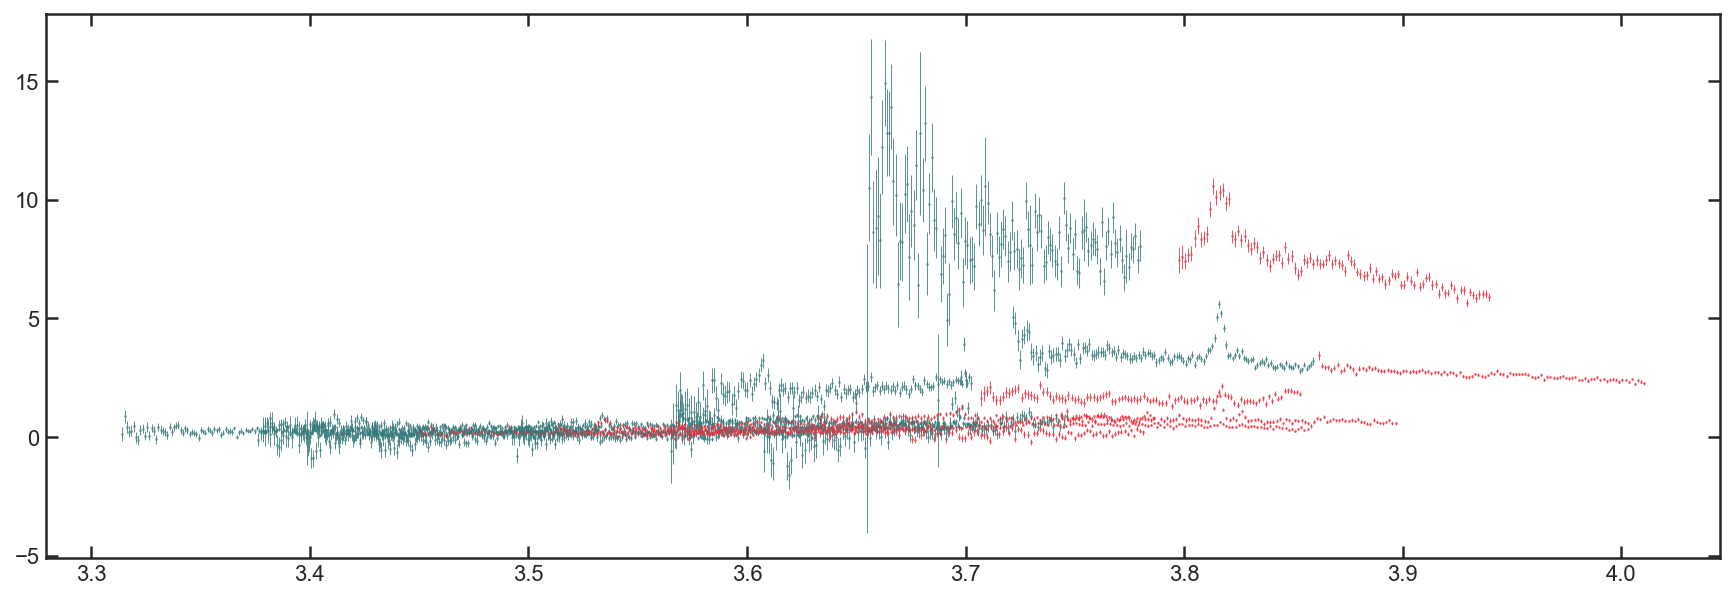

In [10]:
plt.figure(figsize = [15,5])

for i in SXdb.index:
    if SXdb.zgrism[i] > 0:
        rshift = SXdb.zgrism[i]
    else:
        rshift = SXdb.z_grizli[i]
    
    Gs= Gen_SF_spec(SXdb.field[i], SXdb.id[i], rshift, mask = False)
    
#     plt.figure(figsize = [15,5])
    
    if Gs.g102:
        plt.errorbar(np.log10(Gs.Bwv_rf),Gs.Bfl *1E18,Gs.Ber *1E18,
                linestyle='None', marker='o', markersize=0.25, color='#36787A', zorder = 2, elinewidth = 0.4)

    if Gs.g141:
        plt.errorbar(np.log10(Gs.Rwv_rf),Gs.Rfl *1E18,Gs.Rer *1E18,
                linestyle='None', marker='o', markersize=0.25, color='#EA2E3B', zorder = 2, elinewidth = 0.4)

#     plt.errorbar(np.log10(Gs.Pwv_rf),Gs.Pflx*1E18,Gs.Perr*1E18,
#             linestyle='None', marker='o', markersize=7, markerfacecolor='#B5677D', zorder = 1,
#                  markeredgecolor = '#685877',markeredgewidth = 1, label = '{0}-{1}'.format(SXdb.field[i], SXdb.id[i]))


In [ ]:
flxgrid = []
errgrid = []
swave = np.arange(3000,8000,10)

for i in SXdb.index:
    field = SXdb.field[i]
    galaxy = SXdb.id[i]

    if Bdb.zgrism[i] > 0:
        rshift = Bdb.zgrism[i]
    else:
        rshift = Bdb.z_grizli[i]

    
    flist = glob('../data/posteriors/{}_{}_*_Pm*.npy'.format(field,galaxy))


    for f in flist:
        ext = re.split('{}_{}_'.format(field,galaxy),re.split('_Pm[0-9].npy', os.path.basename(f))[0])[1]
        if ext in ['tabfit', 'SFfit_p1']:
            fext = ext
            break

    if fext == 'tabfit':
        m, a, m1, m2, m3, m4, m5, m6, m7, m8, m9, m10, lm, z, d, \
        bp1, rp1, ba, bb, bl, ra, rb, rl, lwa, logl = np.load(
            '../data/bestfits/{0}_{1}_tabfit_bfit.npy'.format(field, galaxy))
        
        sp = fsps.StellarPopulation(zcontinuous = 1, logzsol = 0, sfh = 3, dust_type = 1)
        sp.params['dust2'] = d
        sp.params['dust1'] = d
        sp.params['logzsol'] = np.log10(m)
        time, sfr, tmax = convert_sfh(get_agebins(a), [m1, m2, m3, m4, m5, m6, m7, m8, m9, m10], maxage = a*1E9)

        
    else:
        m, a, m1, m2, m3, m4, m5, m6, lm, d, \
        bp1, rp1, ba, bb, bl, ra, rb, rl, lwa, logl = np.load(
            '../data/bestfits/{0}_{1}_SFfit_p1_bfit.npy'.format(field, galaxy))
        
        sp = fsps.StellarPopulation(zcontinuous = 1, logzsol = 0, sfh = 3, dust_type = 2)
        sp.params['dust2'] = d
        sp.params['dust1'] = 0
        sp.params['logzsol'] = np.log10(m)
        time, sfr, tmax = convert_sfh(get_agebins(a, binnum=6), [m1, m2, m3, m4, m5, m6], maxage = a*1E9)

        ######### up to here ##############
        
    Gs = Gen_spec(field, galaxy, z, phot_errterm = 0.04, irac_err = 0.08) 

    wvs, flxs, errs, beams, trans = Gather_grism_data(Gs)

    sp.set_tabular_sfh(time,sfr)    

    wave, flux = sp.get_spectrum(tage = a, peraa = True)    

    Gmfl, Pmfl = Full_forward_model(Gs, wave, F_lam_per_M(flux,wave*(1+z),z,0,sp.stellar_mass)*10**lm, z, 
                                    wvs, flxs, errs, beams, trans)

    MFLX = F_lam_per_M(flux,wave*(1+z),z,0,sp.stellar_mass)*10**lm

    IDX = [U for U in range(len(wave)) if 6000 < wave[U] < 6500]

    Nfact = np.trapz(MFLX[IDX],wave[IDX])

    sidx = 0
    sflux = np.zeros(len(swave))
    serror = np.zeros(len(swave))

    if Gs.g102:
        bcal = Calibrate_grism([wvs[sidx], flxs[sidx], errs[sidx]], Gmfl[sidx], bp1)[0]
        bscale = Scale_model( flxs[sidx] / bcal,errs[sidx]/ bcal,Gmfl[sidx])
        iBflx =interp1d(Gs.Bwv_rf,flxs[sidx] / bcal/ bscale / Nfact, fill_value=0, bounds_error=False)(swave)
        iBerr =interp1d(Gs.Bwv_rf,errs[sidx] / bcal/ bscale / Nfact, fill_value=0, bounds_error=False)(swave)
        sflux += iBflx
        serror += iBerr

        sidx += 1

    if Gs.g141:
        rcal = Calibrate_grism([wvs[sidx], flxs[sidx], errs[sidx]], Gmfl[sidx], rp1)[0]
        rscale =Scale_model( flxs[sidx] / rcal,errs[sidx]/ rcal,Gmfl[sidx])
        iRflx =interp1d(Gs.Rwv_rf,flxs[sidx] / rcal/ rscale / Nfact, fill_value=0, bounds_error=False)(swave)
        iRerr =interp1d(Gs.Rwv_rf,errs[sidx] / rcal/ rscale / Nfact, fill_value=0, bounds_error=False)(swave)
        sflux += iRflx
        serror += iRerr

    serror[serror == 0] = 1E5

    flxgrid.append(sflux)
    errgrid.append(serror)        